In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
%matplotlib inline

In [3]:
import cufflinks as cf;
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot; 

In [5]:
init_notebook_mode(connected = True);

In [6]:
import chart_studio.plotly as py;

In [7]:
cf.go_offline();

In [8]:
fatal_enc = pd.read_csv('fatal_encounters_dot_org.csv');

In [9]:
death_arrests = pd.read_csv('deaths_arrests.csv');

In [10]:
death_police = pd.read_csv('police_deaths_538.csv');

In [12]:
death_pol_killings = pd.read_csv('police_killings_MPV.csv');

In [13]:
wash_post_shoot_stats = pd.read_csv('shootings_wash_post.csv');

In [14]:
fatal_enc.head()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,01/01/2000,27898-27804 US-101,...,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,01/01/2000,600 W Cherry Ln,...,A motorcycle was allegedly being driven errati...,Unreported,Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [15]:
death_arrests.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3


In [16]:
death_police.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [17]:
death_pol_killings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Name withheld by police,Unknown,Male,Unknown race,NaN,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,Unknown,Male,Unknown race,NaN,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name withheld by police,61,Male,Unknown race,NaN,05/09/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Name withheld by police,22,Male,Unknown race,NaN,05/09/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Steven D. Smith,33,Male,Unknown race,NaN,04/09/2020,200 N. State Street,Syracuse,NY,13203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
wash_post_shoot_stats.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Exploratory Data Analysis

### For dataset 1: Police deaths. Dataframe_name: death_police 

In [19]:
death_police.columns

Index(['person', 'dept', 'eow', 'cause', 'cause_short', 'date', 'year',
       'canine', 'dept_name', 'state'],
      dtype='object')

In [21]:
death_police.describe()

,year
count,22800.000000
mean,1951.751272
std,38.233234
min,1791.000000
25%,1924.000000
50%,1952.000000
75%,1983.000000
max,2016.000000


In [22]:
death_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       22800 non-null  object
 1   dept         22800 non-null  object
 2   eow          22800 non-null  object
 3   cause        22800 non-null  object
 4   cause_short  22800 non-null  object
 5   date         22800 non-null  object
 6   year         22800 non-null  int64 
 7   canine       22800 non-null  bool  
 8   dept_name    22800 non-null  object
 9   state        22800 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 1.6+ MB


In [23]:
death_police.isnull().sum()

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

to simplify this analysis, I am going to reference this dataset with variable <strong>df</strong> for now; this variable name will be reassigned to other datasets later on

In [24]:
df = death_police.copy(deep = True);

In [29]:
for i in df.columns:
    print('Column', i, ': \n', df[i].value_counts(), '\n');

Column person : 
 K9 Rocky                                4
K9 King                                 3
K9 Bruno                                3
K9 Sarge                                3
K9 Roscoe                               3
                                       ..
Game Warden Harvey M. Carter            1
Detective Sergeant John F. Mickley      1
Deputy Game Warden John W. Hollowell    1
Deputy Game Warden Joseph Saunders      1
K9 Credo                                1
Name: person, Length: 22742, dtype: int64 

Column dept : 
 New York City Police Department, NY                                         753
Chicago Police Department, IL                                               492
Puerto Rico Police Department, PR                                           338
United States Department of Justice - United States Marshals Service, US    279
Philadelphia Police Department, PA                                          256
                                                            

In [31]:
for i in df.columns:
    print('Column', i, ': \n', df[i].nunique(), '\n');

Column person : 
 22742 

Column dept : 
 6528 

Column eow : 
 17158 

Column cause : 
 36 

Column cause_short : 
 36 

Column date : 
 17158 

Column year : 
 202 

Column canine : 
 2 

Column dept_name : 
 5525 

Column state : 
 60 



## For dataset 2: Police Killings, Dataframe_name: death_pol_killings

Similar to earlier, I am going to reference the death_pol_killings dataframe as <strong>df</strong> here temporarily for the sake of simplicity.

In [32]:
df = death_pol_killings.copy(deep = True);

In [33]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-co

In [34]:
df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
8422    Suburban
8423       Urban
8424       Urban
8425       Urban
8426    Suburban
Name: Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ), Length: 8427, dtype: object

<AxesSubplot:>

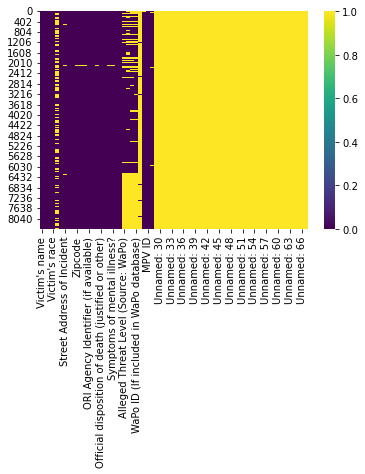

In [40]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [43]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).columns

Index(['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'],
      dtype='object')

<AxesSubplot:>

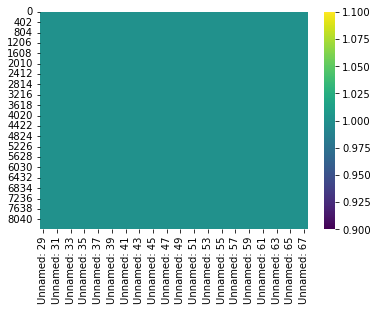

In [44]:
sns.heatmap(df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).isnull(), cmap = 'viridis')

In [45]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).isnull().sum()

Unnamed: 29    8427
Unnamed: 30    8427
Unnamed: 31    8427
Unnamed: 32    8427
Unnamed: 33    8427
Unnamed: 34    8427
Unnamed: 35    8427
Unnamed: 36    8427
Unnamed: 37    8427
Unnamed: 38    8427
Unnamed: 39    8427
Unnamed: 40    8427
Unnamed: 41    8427
Unnamed: 42    8427
Unnamed: 43    8427
Unnamed: 44    8427
Unnamed: 45    8427
Unnamed: 46    8427
Unnamed: 47    8427
Unnamed: 48    8427
Unnamed: 49    8427
Unnamed: 50    8427
Unnamed: 51    8427
Unnamed: 52    8427
Unnamed: 53    8427
Unnamed: 54    8427
Unnamed: 55    8427
Unnamed: 56    8427
Unnamed: 57    8427
Unnamed: 58    8427
Unnamed: 59    8427
Unnamed: 60    8427
Unnamed: 61    8427
Unnamed: 62    8427
Unnamed: 63    8427
Unnamed: 64    8427
Unnamed: 65    8427
Unnamed: 66    8427
Unnamed: 67    8427
dtype: int64

In [46]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).columns

Index(['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'],
      dtype='object')

In [47]:
df.drop(columns = ['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnam.ded: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'], inplace = True);

In [48]:
death_pol_killings.drop (columns = ['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'], inplace = True)

<AxesSubplot:>

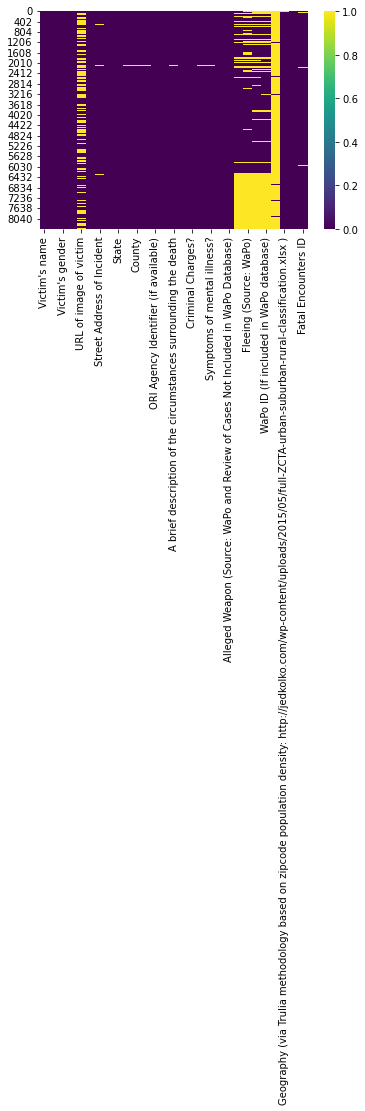

In [49]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [52]:
for i in df.columns:
    print('Column', i, 'null Values: \n', df[i].isnull().sum(), '\n');

Column Victim's name null Values: 
 0 

Column Victim's age null Values: 
 0 

Column Victim's gender null Values: 
 12 

Column Victim's race null Values: 
 0 

Column URL of image of victim null Values: 
 3888 

Column Date of Incident (month/day/year) null Values: 
 0 

Column Street Address of Incident null Values: 
 87 

Column City null Values: 
 6 

Column State null Values: 
 0 

Column Zipcode null Values: 
 36 

Column County null Values: 
 14 

Column Agency responsible for death null Values: 
 15 

Column ORI Agency Identifier (if available) null Values: 
 1 

Column Cause of death null Values: 
 0 

Column A brief description of the circumstances surrounding the death null Values: 
 17 

Column Official disposition of death (justified or other) null Values: 
 11 

Column Criminal Charges? null Values: 
 0 

Column Link to news article or photo of official document null Values: 
 11 

Column Symptoms of mental illness? null Values: 
 9 

Column Unarmed/Did Not Have an Actua

In [54]:
for i in df.columns:
    print('Column', i, ': \n', df[i].value_counts(), '\n');

Column Victim's name : 
 Name withheld by police    258
Michael Brown                3
Robert Edwards               3
Christopher Anderson         2
Andrew Thomas                2
                          ... 
Benjamin Gregware            1
Mark Daniels                 1
Raymond Bishop               1
Ronell Foster                1
Andrew Layton                1
Name: Victim's name, Length: 8129, dtype: int64 

Column Victim's age : 
 25         278
31         273
Unknown    271
28         264
32         264
          ... 
10           1
95           1
93           1
7            1
107          1
Name: Victim's age, Length: 87, dtype: int64 

Column Victim's gender : 
 Male           7981
Female          421
Transgender       9
Unknown           4
Name: Victim's gender, dtype: int64 

Column Victim's race : 
 White               3711
Black               2121
Hispanic            1456
Unknown race         845
Asian                130
Native American      118
Pacific Islander      46
Nam

<strong>NOTE:</strong> 
- mental illness column: has 3 different values for 'unknown' due to case sensitivity and typos
- Off-Duty Killing? column: 3 values for off-duty due to case sensitivity